# Project #1, Part 3: Data Analysis and Visualization
### Alexis Brito
### Octuber 2025
### Goal : Make a deeper analisis with graph with the data already cleanned 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/britocedeno.alexi/Downloads/cleaned_Majors Survey Results - Fall 2024.csv")

## Which age groups of non-major student are most interested in computing classes?

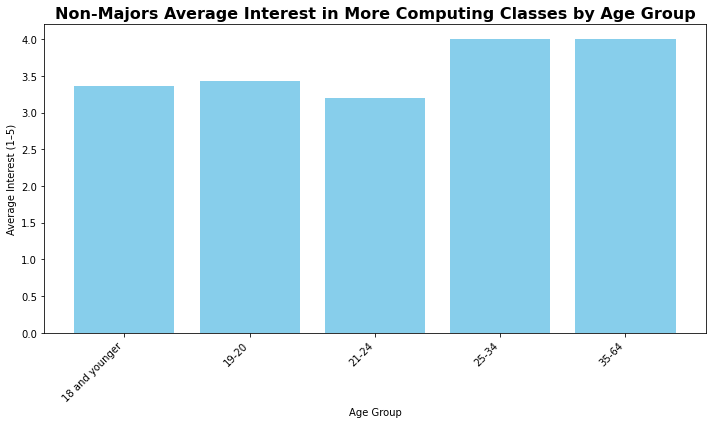

In [3]:
# Sort the columns 
age_order = sorted(df['age'].dropna().unique())
# Average Interest in More Computing Classes by Age
age_interest = df.groupby('age')['interest_more_classes_scale'].mean().reindex(age_order)

#First graph 
plt.figure(figsize=(10, 6))
plt.bar(age_interest.index, age_interest.values, color='skyblue')
plt.title('Non-Majors Average Interest in More Computing Classes by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Average Interest (1–5)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('1_age_interest.png')
plt.show()

### As we can see in the graph, all age groups have an interest level above 3.0. However, the 24–34 and 35–64 age groups are tied at 4.0. This result surprised me because I thought younger people would have more interest in computing classes.

## Why non-computing majors are taking computing classes as elective classes?

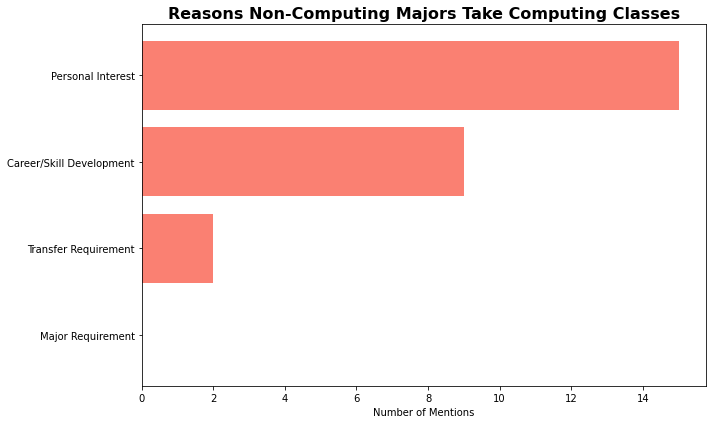

In [4]:
computing_majors = ['electrical engineering', 'Mech E', 'Computer Science', 'Information Technology', 'Engineering', 'Computing', 'cybersecurity', 'Data science','cyberseucirty']
non_computing_df = df[~df['degree_program'].isin(computing_majors)]

keywords = {
    'Career/Skill Development': 'skill|job|career|marketable|useful|future',
    'Major Requirement': 'require|needed for|mandatory|must',
    'Personal Interest': 'interest|curious|fun|like|enjoy',
    'Transfer Requirement': 'transfer|4-year|bachelor'
}

explanations = non_computing_df['interest_explanation'].dropna().str.lower()
reasons_counts = {k: explanations.str.contains(v, regex=True).sum() for k, v in keywords.items()}

reasons_series = pd.Series(reasons_counts).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(reasons_series.index, reasons_series.values, color='salmon')
plt.title('Reasons Non-Computing Majors Take Computing Classes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.savefig('2_non_computing_reasons.png')
plt.show()


### The graph shows the main reasons why most students are taking these classes. Personal interest is a strong motivation because it shows how technology captures people’s attention through innovation. In addition, many students want to develop new skills, such as learning programming languages or creating a game.

## What percentage of non-computing majors are interested in taking more computing classes?

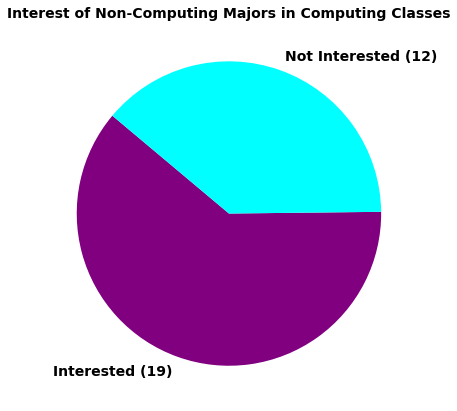

In [5]:
interested = (non_computing_df['interest_more_classes_scale'] >= 4).sum()
total = non_computing_df['interest_more_classes_scale'].notna().sum()
not_interested = total - interested

plt.figure(figsize=(7, 7))
plt.pie(
    [interested, not_interested],
    labels=[f'Interested ({interested})', f'Not Interested ({not_interested})'],
    startangle=140,
    colors=['purple', 'cyan'],
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)
plt.title('Interest of Non-Computing Majors in Computing Classes', fontsize=14, fontweight='bold')
plt.savefig('3_percentage_interested.png')
plt.show()

### The previous question is connected to this one because most students who have taken computing classes show a strong interest in continuing to develop these skills. 

## From which non-computing majors do the most students transfer into computing classes?

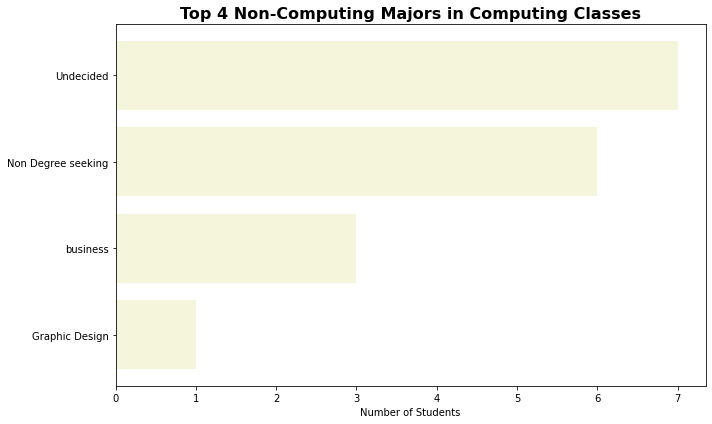

In [6]:

top_majors = non_computing_df['degree_program'].value_counts().nlargest(4)

plt.figure(figsize=(10, 6))
plt.barh(top_majors.index, top_majors.values, color='beige')
plt.title('Top 4 Non-Computing Majors in Computing Classes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Students')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('3_top_non_computing_majors.png')
plt.show()

### Most of the students transferring to computing classes were either undecided about choosing a major or not initially pursuing a degree. After taking these classes, they may have decided to fully enroll in this major.